### Deep learning

#### AI > ML > DL

- ai: 인간의 지능을 특정 부분에서 흉내낸 기계, 포괄적인 개념

- ml: ai의 하위개념, 모델 학습 과정에서 parameter를 기계가 찾아줌

- dl: ml중 뉴럴넷 이용하는 기계

#### dl 성공요인 : 
- feature 요인이 적다, 알아서 골라줌
- 기존보다 훨씬 좋은 성능
- GPU의 발달, 네트워크 학습시 mat mul이 훨씬 빨라짐

### Perceptron
- logistic regression과 유사

- 인풋을 받아 아웃풋을 내어놓는다

- 다수의 신호를 입력으로 받아 하나의 신호를 출력
- 이진 값만 가짐
     - 1: 신호가 흐름
     - 0: 신호가 흐르지 않음
     
![1](https://user-images.githubusercontent.com/38183218/43946493-609b3fc8-9cc0-11e8-98df-9b7c7db31549.PNG)



In [1]:
import numpy as np
import matplotlib.pylab as plt

#### Gates 구현

![2](https://user-images.githubusercontent.com/38183218/43946494-60c9269a-9cc0-11e8-8890-7f7ae18ad647.PNG)


In [2]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <=0:
        return 0
    else:
        return 1

![3](https://user-images.githubusercontent.com/38183218/43946496-6105787a-9cc0-11e8-87e3-37447a04460a.PNG)

In [21]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5 ,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp<=0:
        return 0
    else:
        return 1

In [6]:
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp<=0:
        return 0
    else:
        return 1

#### XOR 게이트
- 배타적 논리합
- x1,x2 중 한쪽이 1일때만 1을 출력
- 직선(단층 퍼셉트론)으로 표현할 수 없다

![](http://toritris.weebly.com/uploads/1/4/1/3/14134854/3587654.jpg?323)

- 다층 퍼셉트론으로 해결

In [23]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [24]:
if __name__=="__main__":
    for xs in [(0,0),(1,0),(0,1),(1,1)]:
        y1 = AND(xs[0],xs[1])
        y2 = NAND(xs[0],xs[1])
        y3 = OR(xs[0],xs[1])
        
        print("AND: "+str(xs)+" -> "+str(y1))
        print("NAND: "+str(xs)+" -> "+str(y2))
        print("OR: "+str(xs)+" -> "+str(y3))
    
    print("\n")
    for xs in [(0,0),(1,0),(0,1),(1,1)]:
        y4 = XOR(xs[0],xs[1])
        print("XOR: "+str(xs)+" -> "+str(y4))

AND: (0, 0) -> 0
NAND: (0, 0) -> 1
OR: (0, 0) -> 0
AND: (1, 0) -> 0
NAND: (1, 0) -> 1
OR: (1, 0) -> 1
AND: (0, 1) -> 0
NAND: (0, 1) -> 1
OR: (0, 1) -> 1
AND: (1, 1) -> 1
NAND: (1, 1) -> 0
OR: (1, 1) -> 1


XOR: (0, 0) -> 0
XOR: (1, 0) -> 1
XOR: (0, 1) -> 1
XOR: (1, 1) -> 0


#### Linear Classification
![3](https://user-images.githubusercontent.com/38183218/45800306-791bc680-bceb-11e8-9600-a6ef2c0a987f.PNG)

- Each __row__ of weight matrix corresponds to some __template__ for __one of the classes__
- Inner producted by given stretched pixels(column), we can compute the similarity with the class



![4](https://user-images.githubusercontent.com/38183218/45800717-ba60a600-bcec-11e8-9cf0-1d6f46d1e4b7.PNG)
- 예를 들면, the ship template는 많은 blue pixcels 를 지닌다 
    - 그러므로 바다와 같은 이미지와 매칭되었을때 높은 score를 도출한다
    
- 한계는 only learning one template for each class

### Neural Network
- 인간의 뇌를 본따 레이어를 여러개 쌓은 네트워크
- 각 레이어마다 아웃풋을 내어놓는데 이를 활성함수를 이용해 변환한다

![4](https://user-images.githubusercontent.com/38183218/43946497-6133c248-9cc0-11e8-9253-0137e90dc148.PNG)

- 퍼셉트론의 한계는 가중치를 결정하는 작업을 수동으로 했다는 것이다
- AND, OR 게이트 함수 만들때 가중치에 여러개의 답이 있었는데, 적절한 값을 찍어서 정했었다
- 반면, 신경망은 가중치를 데이터를 학습한 모델이 정해준다

In [28]:
#step
def step_function(x):
    return np.array(x>0, dtype = np.int)

#시그모이드
def sigmoid(x):
    return 1 / (1+np.exp(-x))

#ReLu
def relu(x):
    return np.maximum(0, x)

X = np.arange(-7.0, 7.0, 0.1)

(-0.1, 1.1)

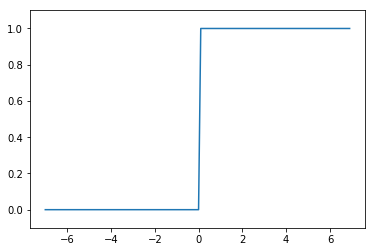

In [29]:
Y1 = step_function(X)
plt.plot(X,Y1)
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

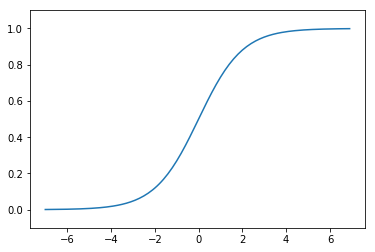

In [30]:
Y2 = sigmoid(X)
plt.plot(X,Y2)
plt.ylim(-0.1,1.1)


#### 계단함수와 시그모이드 비교
- 공통점 
    - 큰 관점에서 보면 같은 모양. 둘 다 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조 
    - 비선형 함수
- 차이점  
    - ＇매끄러움＇ 의 차이 
    - 매끄럽다는 것은 출력값이 연속적으로 변화한다는 뜻 
    - 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 됨
    
    


- 시그모이드의 한계
    - 'kill' the gradients : 크거나 작은 값에 대해 0 or 1로 고정되어 미분안되는 문제 + gradient 크기 최대가 0.25 이하
    - are not zero-centered:  인풋뉴런이 postive 일 경우 W에 대한 gradient가 언제나 모두 postive 하거나 모두 negative하게됨 -> 지그재그 path만 가능해서 최적화 안되는 문제
    - exp() is a bit compute expensive: 연산이 부담됨
  
  
- tanh(x)는? (= 2\*sigmoid -1 )
    - Squashes numbers to range [-1,1]
    - zero centered
    -----------------------------------
    - but still kills gradients when saturated

![대체 텍스트](https://taewanmerepo.github.io/2017/12/tanh/010.jpg)
![대체 텍스트](https://taewanmerepo.github.io/2017/12/tanh/020.jpg)

- ReLu
    - Does not saturate( in +region): since 미분값이 0 or 1, 1로 gradient 계속 흘러도(멱수로 쌓여도) still 1
    - computationally effcient(6배 정도)
    - converge much faster than sigmoid or tanh
    - deep하게 레이어 쌓을때 진리
    ------------------------------------
    - but - not zero centered
    - An annoyance -> killing the gradient on the half of the regime
    - bad ReLus존재해 아예 죽어버림, initialization이 중요

(-0.1, 7.5)

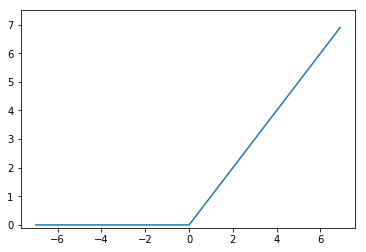

In [32]:
Y3 = relu(X)
plt.plot(X,Y3)
plt.ylim(-0.1,7.5)

![대체 텍스트](https://cdn-images-1.medium.com/max/1600/1*g0yxlK8kEBw8uA1f82XQdA.png)

- Leaky ReLU
![1](https://user-images.githubusercontent.com/38183218/45797252-b0847600-bcdf-11e8-8fc7-aad0fc81109a.PNG)

- ELU
![2](https://user-images.githubusercontent.com/38183218/45797255-b11d0c80-bcdf-11e8-9d83-926133656924.PNG)

#### 3층 신경망
![](https://user-images.githubusercontent.com/38183218/43989674-a52a74a0-9d89-11e8-9d5e-d7288fce7d5d.PNG)
![](https://user-images.githubusercontent.com/38183218/43989675-a553c148-9d89-11e8-8a72-29e2ccb2a915.PNG)

![](https://user-images.githubusercontent.com/38183218/43989676-a57e0d4a-9d89-11e8-842b-83a5e050f5d5.PNG)
![](https://user-images.githubusercontent.com/38183218/43989677-a5a94d0c-9d89-11e8-9453-6d100e8c16df.PNG)

#### 출력층 설계하기
분류(Classification)와 추정(Estimation, 회귀(Regression))에 모두 사용 가능, 시그마로 표기해 활성함수와 다름을 명시
- 추정의 경우
     - 항등 함수(identity function)
- 분류의 경우
    - 소프트맥수 함수(softmax function)
        - 출력값은 0과 1 사이
        - 총합은 1
        - 확률로 해석 가능

![5](https://user-images.githubusercontent.com/38183218/43946498-6164fe30-9cc0-11e8-84cf-1a11601790b0.PNG)

소프트 맥스 함수 구현

In [37]:
def softmax(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y


 - 구현상 문제점
     - 지수 함수는 쉽게 큰 값을 출력함
         - exp(10) > 20,000, exp(100) > 10…..0, 40개 넘음
         - 이러한 큰 값끼리의 나눗셈은 수치가 불안정해짐

 - 해결
     - 분모, 분자에서 동일한 값(입력 신호 중 최댓값)을 빼줌

In [34]:
def softmax(a):
    c = np.max(a)
    exp_a= np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

In [35]:
class Network_3f:
    def __init__(self,W1,b1,W2,b2,W3,b3):
        self.network = {}
        self.network['W1'] = W1
        self.network['b1'] = b1
        self.network['W2'] = W2
        self.network['b2'] = b2
        self.network['W3'] = W3
        self.network['b3'] = b3
        
    def forward(self,x):
        a1 = np.dot(x,self.network['W1'])+self.network['b1']
        z1 = sigmoid(a1)
        a2 = np.dot(z1,self.network['W2'])+self.network['b2']
        z2 = sigmoid(a2)
        a3 = np.dot(z2,self.network['W3']) + self.network['b3']
        y = softmax(a3)
        return y

In [36]:
W1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
b1 = np.array([0.1, 0.2, 0.3])
W2 = np.array([[0.1,0.4], [0.2,0.5],[0.3,0.6]])
b2 = np.array([0.1,0.2])
W3 = np.array([[0.1,0.3], [0.2,0.4]])
b3 = np.array([0.1,0.2])

net1 = Network_3f(W1,b1,W2,b2,W3,b3)
x = np.array([1.0,0.5])
y = net1.forward(x)
print(y)

[0.40625907 0.59374093]


#### MNIST DataSet

In [44]:
from tensorflow.examples.tutorials.mnist import input_data

import warnings
# warnings.("ignore")

mnist = input_data.read_data_sets("samples/MNIST_data/", one_hot=True)

Extracting samples/MNIST_data/train-images-idx3-ubyte.gz
Extracting samples/MNIST_data/train-labels-idx1-ubyte.gz
Extracting samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting samples/MNIST_data/t10k-labels-idx1-ubyte.gz


In [52]:
print(mnist.train.images.shape, mnist.test.images.shape)

(55000, 784) (10000, 784)


In [58]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [59]:
X_train, X_test, y_train, y_test = mnist.train.images, mnist.test.images, mnist.train.labels, mnist.test.labels

In [61]:
img = X_train[0].reshape(28,28)

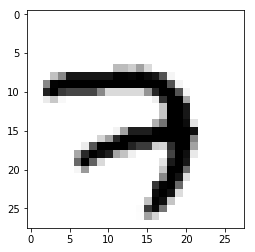

In [63]:
plt.imshow(img,cmap='Greys')

In [68]:
np.random.seed(180811)

In [83]:
W1 = np.random.normal(size=(784,50))
b1 = np.ones((1,50))

W2 = np.random.normal(size=(50,100))
b2 = np.ones((1,100))

W3 = np.random.normal(size=(100,10))
b3 = np.ones((1,10))

net_3f = Network_3f(W1,b1,W2,b2,W3,b3)

y = net_3f.forward(X_train)

In [85]:
def predict(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(X,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)
    
    return y

In [102]:
# 랜덤 가중치, 순전파 1회의 accuracy
np.sum(np.argmax(predict(net_3f.network, X_train), axis=1) == np.argmax(y_train,axis=1))/len(y_train)

0.09909090909090909